In [22]:
import torch
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator
import cv2

import matplotlib.pyplot as plt

import numpy as np

## SAM

In [23]:
checkpoint_path = "SAM/sam_vit_h_4b8939.pth"
sam_model = sam_model_registry["vit_h"](checkpoint=checkpoint_path)

c:\Users\yanru\anaconda3\envs\hotdog\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [24]:
mask_generator = SamAutomaticMaskGenerator(sam_model)

In [25]:
image_path = "img/test1.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [26]:
result = mask_generator.generate(image_rgb)

In [49]:
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     sorted_result = sorted(result_dict, key=(lambda x: x['area']),reverse=True)
     # Plot for each segment area
     for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

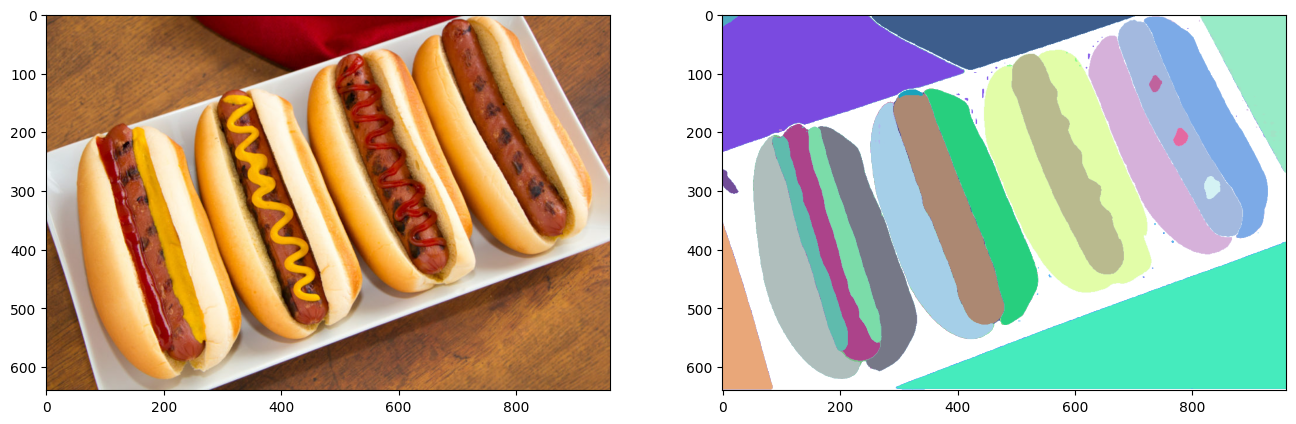

In [50]:
_,axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(result, axes[1])

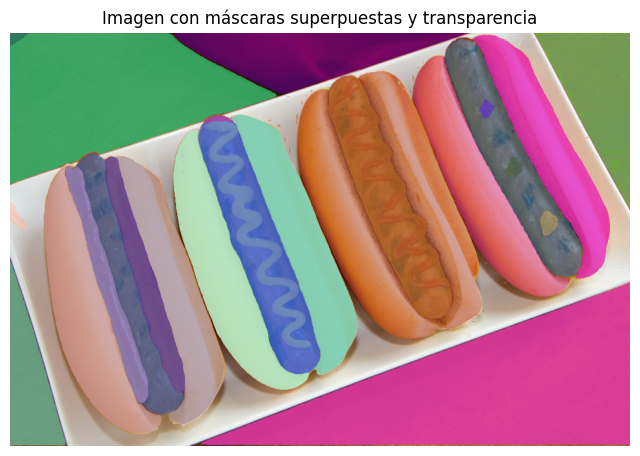

In [48]:
def overlay_masks(image, result_dict, alpha=0.5):
    """
    Superpone máscaras sobre la imagen con transparencia.
    
    Args:
    - image: Imagen original (en formato RGB).
    - result_dict: Lista de diccionarios con las máscaras generadas por SAM.
    - alpha: Transparencia de las máscaras (0.0 a 1.0, donde 0 es totalmente transparente).
    
    Returns:
    - overlaid_image: Imagen con las máscaras superpuestas.
    """
    overlaid_image = image.copy()
    
    sorted_result = sorted(result_dict, key=lambda x: x['area'], reverse=True)
    
    for val in sorted_result:
        mask = val['segmentation']
        color_mask = np.random.random(3)
        for c in range(3):
            overlaid_image[:, :, c] = np.where(
                mask,
                overlaid_image[:, :, c] * (1 - alpha) + color_mask[c] * 255 * alpha,
                overlaid_image[:, :, c]
            )
    
    return overlaid_image

overlaid_image = overlay_masks(image_rgb, result, alpha=0.5)

plt.figure(figsize=(8, 8))
plt.imshow(overlaid_image.astype("uint8"))
plt.axis("off")
plt.title("Imagen con máscaras superpuestas y transparencia")
plt.show()


## Grounding DINO